# Cluster Analysis
## Part - 1

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
os.chdir("C:/Users/pc/Desktop")

## Load the data

In [3]:
data = pd.read_csv("lat_long.csv")

In [4]:
data

,Country,Latitude,Longitude,Language
0,USA,37.090240,-95.712891,English
1,Canada,56.130366,-106.346771,English
2,France,46.227638,2.213749,French
3,UK,55.378051,-3.435973,English
4,Germany,51.165691,10.451526,German
5,Australia,-25.274398,133.775136,English
6,India,20.593684,78.962880,Hindi


# Plot the data

<function matplotlib.pyplot.show(*args, **kw)>

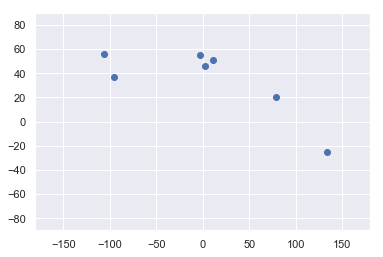

In [5]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

# Select the features

In [6]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,37.090240,-95.712891
1,56.130366,-106.346771
2,46.227638,2.213749
3,55.378051,-3.435973
4,51.165691,10.451526
5,-25.274398,133.775136
6,20.593684,78.962880


## Clustering

In [9]:
Kmeans = KMeans(2)

In [11]:
Kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
identify_clusters = Kmeans.fit_predict(x)
identify_clusters

array([1, 1, 1, 1, 1, 0, 0])

In [17]:
data_with_cluster = data.copy()
data_with_cluster["Clusters"] = identify_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Clusters
0,USA,37.090240,-95.712891,English,1
1,Canada,56.130366,-106.346771,English,1
2,France,46.227638,2.213749,French,1
3,UK,55.378051,-3.435973,English,1
4,Germany,51.165691,10.451526,German,1
5,Australia,-25.274398,133.775136,English,0
6,India,20.593684,78.962880,Hindi,0


<function matplotlib.pyplot.show(*args, **kw)>

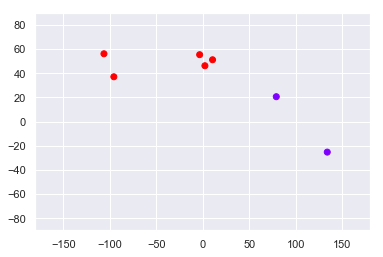

In [22]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c= data_with_cluster['Clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

# Part - 2

In [35]:
maped_data = data.copy()
maped_data

,Country,Latitude,Longitude,Language
0,USA,37.090240,-95.712891,English
1,Canada,56.130366,-106.346771,English
2,France,46.227638,2.213749,French
3,UK,55.378051,-3.435973,English
4,Germany,51.165691,10.451526,German
5,Australia,-25.274398,133.775136,English
6,India,20.593684,78.962880,Hindi


## Select features

In [36]:
maped_data["Language"] = maped_data["Language"].map({"English":0,"German":1,"Hindi":2,"French":3})
maped_data

,Country,Latitude,Longitude,Language
0,USA,37.090240,-95.712891,0
1,Canada,56.130366,-106.346771,0
2,France,46.227638,2.213749,3
3,UK,55.378051,-3.435973,0
4,Germany,51.165691,10.451526,1
5,Australia,-25.274398,133.775136,0
6,India,20.593684,78.962880,2


In [83]:
y = maped_data.iloc[:,3:4]
y

,Latitude,Longitude,Language
0,37.090240,-95.712891,0
1,56.130366,-106.346771,0
2,46.227638,2.213749,3
3,55.378051,-3.435973,0
4,51.165691,10.451526,1
5,-25.274398,133.775136,0
6,20.593684,78.962880,2


In [84]:
Kmeans_lag = KMeans(3)

In [85]:
Kmeans_lag.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [86]:
identify_clusters_lang = Kmeans_lag.fit_predict(y)
identify_clusters_lang

array([0, 0, 1, 1, 1, 2, 2])

In [87]:
data_lang_cluster = data.copy()
data_lang_cluster["Clusters"] = identify_clusters_lang
data_lang_cluster

,Country,Latitude,Longitude,Language,Clusters
0,USA,37.090240,-95.712891,English,0
1,Canada,56.130366,-106.346771,English,0
2,France,46.227638,2.213749,French,1
3,UK,55.378051,-3.435973,English,1
4,Germany,51.165691,10.451526,German,1
5,Australia,-25.274398,133.775136,English,2
6,India,20.593684,78.962880,Hindi,2


<function matplotlib.pyplot.show(*args, **kw)>

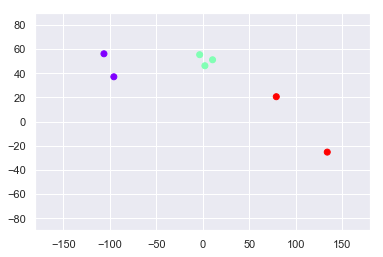

In [88]:
plt.scatter(data_lang_cluster['Longitude'],data_lang_cluster['Latitude'],c= data_lang_cluster['Clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

# Selecting numbers of clustors

### WCSS

In [72]:
Kmeans.inertia_

46.122668666268986

In [73]:
wcss = []

for i in range(1,7):
    Kmeans = KMeans(i)
    Kmeans.fit(x)
    wcss_iter = Kmeans.inertia_
    wcss.append(wcss_iter)

In [74]:
wcss

[49762.95826320109,
 15959.500264494782,
 2931.435531167599,
 377.30335408346855,
 139.50045310833067,
 46.122668666268986]

Text(0,0.5,'Within- Clustors Sum of squares')

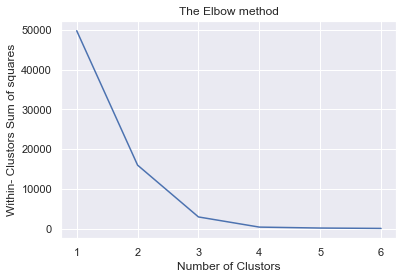

In [77]:
num_cluster = range(1,7)
plt.plot(num_cluster,wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clustors")
plt.ylabel("Within- Clustors Sum of squares")